In [1]:
import torch
import numpy as np

def generate_data(seq_len: int, num_samples: int):
    X = []
    y = []

    xx = np.linspace(0, 20 * np.pi, num_samples)
    xx = np.sin(xx)
    xx += np.random.normal(0, 0.2, size = len(xx))

    for i in range(num_samples - seq_len):
        X.append(xx[i: i + seq_len])
        y.append(xx[i + seq_len])
    # end for
    return np.array(X), np.array(y)
# end def

seq_len = 20 
num_samples = 1000 
input_size = 1
hidden_size = 50
output_size = 1
num_layers = 2
epochs = 200
batch_size = 2

X, y = generate_data(seq_len, num_samples)

X_train = torch.tensor(X[:800], dtype = torch.float32).unsqueeze(-1)
y_train = torch.tensor(y[:800], dtype = torch.float32).unsqueeze(-1)

X_test = torch.tensor(X[800:], dtype = torch.float32).unsqueeze(-1)
y_test = torch.tensor(y[800:], dtype = torch.float32).unsqueeze(-1)

In [2]:
from Models.ModelWrapper import ModelWrapper

args = {
    'hidden_size' : 20,
    'num_layers' : 3,
    'seq_len' : 30,
    'optimazer' : 'rmsprop',
    'use_batch_norm' : True,
    'dropout_rate' : 0.4
}

model = ModelWrapper(type = 'lstm', **args)

model.fit(X = X_train, 
          y = y_train, 
          epochs = epochs, 
          batch_size = batch_size, 
          verbose = True,
          X_val = X_test,
          y_val = y_test)
model.score(X = X_test, y = y_test)

/home/masikol/main/UDSpredictor/usdvenv/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([180, 1])) that is different to the input size (torch.Size([180, 180, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/200], Loss: 0.35282292193937337, Val Loss: 0.8413847088813782
Epoch [2/200], Loss: 0.3249738664180768, Val Loss: 0.8163185715675354
Epoch [3/200], Loss: 0.32785629962020724, Val Loss: 0.6102699637413025
Epoch [4/200], Loss: 0.3170615224301582, Val Loss: 0.6389857530593872
Epoch [5/200], Loss: 0.30108887787573624, Val Loss: 6.111311912536621
Epoch [6/200], Loss: 0.32827405219250066, Val Loss: 5.509675025939941
Epoch [7/200], Loss: 0.3038785497898607, Val Loss: 71.23171997070312
Epoch [8/200], Loss: 0.31851990170194766, Val Loss: 126.59563446044922
Epoch [9/200], Loss: 0.3326031129956391, Val Loss: 84.8399429321289
Epoch [10/200], Loss: 0.3304499467782307, Val Loss: 1.3179303407669067
Reduced learning rate to 0.0001
Epoch [11/200], Loss: 0.32412724363835876, Val Loss: 3.6739211082458496
Epoch [12/200], Loss: 0.31143666765390665, Val Loss: 10.16445541381836
Epoch [13/200], Loss: 0.31884666644065873, Val Loss: 1.3209302425384521
Epoch [14/200], Loss: 0.29531132198251725, Val Loss:

/home/masikol/main/UDSpredictor/usdvenv/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([180, 1])) that is different to the input size (torch.Size([180, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


1.0117380619049072

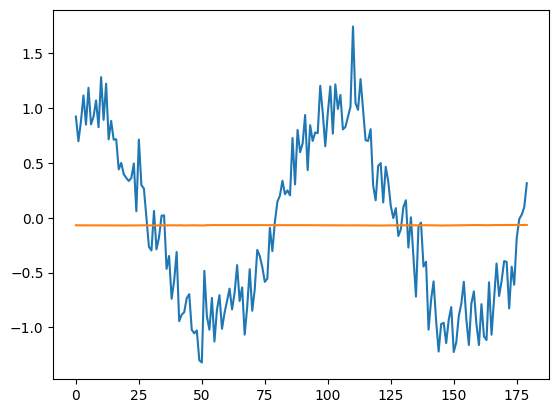

In [3]:
import matplotlib.pyplot as plt

pred = list(map(float, model.predict(X = X_test, steps = len(y_test))))
true = list(map(float, y_test))

plt.plot(np.arange(len(pred)), true)
plt.plot(np.arange(len(pred)), pred)

In [4]:
from Models.ModelWrapper import ModelWrapper

args = {
    'hidden_size' : 20,
    'num_layers' : 3,
    'seq_len' : 20,
    'optimazer' : 'rmsprop',
    'use_batch_norm' : False,
    'dropout_rate' : 0
}

model = ModelWrapper(type = 'gru', **args)

model.fit(X = X_train, 
          y = y_train, 
          epochs = epochs, 
          batch_size = batch_size, 
          verbose = True,
          X_val = X_test,
          y_val = y_test
          )

model.score(X = X_test, y = y_test)

/home/masikol/main/UDSpredictor/usdvenv/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([180, 1])) that is different to the input size (torch.Size([180, 180, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/200], Loss: 0.08616484580532414, Val Loss: 1.801445484161377
Epoch [2/200], Loss: 0.060223008509419744, Val Loss: 0.7933511137962341
Epoch [3/200], Loss: 0.059517697603696434, Val Loss: 1.064537525177002
Epoch [4/200], Loss: 0.057326384367624994, Val Loss: 1.2124730348587036
Epoch [5/200], Loss: 0.0575250700997276, Val Loss: 1.3308392763137817
Epoch [6/200], Loss: 0.05636255264027568, Val Loss: 1.6694644689559937
Epoch [7/200], Loss: 0.05724767572733981, Val Loss: 1.1253280639648438
Epoch [8/200], Loss: 0.05656291295767005, Val Loss: 1.2489289045333862
Epoch [9/200], Loss: 0.055322000799133096, Val Loss: 1.3740042448043823
Reduced learning rate to 0.0001
Epoch [10/200], Loss: 0.051353266667283605, Val Loss: 0.92771315574646
Epoch [11/200], Loss: 0.05052541592216585, Val Loss: 1.0497937202453613
Epoch [12/200], Loss: 0.05024926223501097, Val Loss: 0.9654006361961365
Epoch [13/200], Loss: 0.05017665547958131, Val Loss: 0.9731292128562927
Epoch [14/200], Loss: 0.04999184920583502

/home/masikol/main/UDSpredictor/usdvenv/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([180, 1])) that is different to the input size (torch.Size([180, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


1.0473040342330933

In [5]:
from sklearn.metrics import mean_squared_error

pred = list(map(float, model.predict(X = X_test, steps = len(y_test))))
true = list(map(float, y_test))
mse = mean_squared_error(true, pred)
print(f'{mse:10f}')

  1.858404


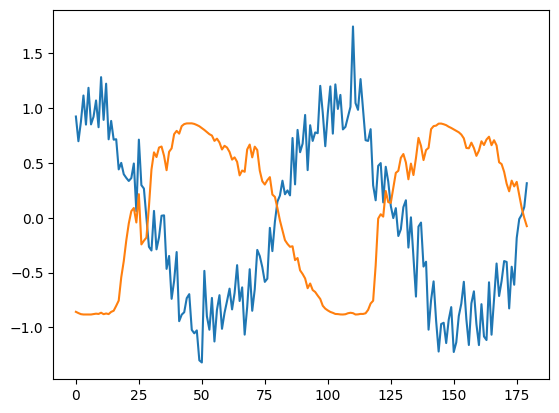

In [6]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(pred)), true)
plt.plot(np.arange(len(pred)), pred)

In [1]:
from DataLoaders.DataLoaderWrapper import DataLoaderWrapper

wrapper = DataLoaderWrapper(period = 'post', do_scale = True)
df = wrapper.get_data()
df

,Date,Cost
1587,2022-05-07,0.146454
1588,2022-05-08,0.146454
1589,2022-05-09,0.146454
1590,2022-05-10,0.148552
1591,2022-05-11,0.199748
...,...,...
2452,2024-09-18,0.829731
2453,2024-09-19,0.830571
2454,2024-09-20,0.846832
2455,2024-09-21,0.846832


In [7]:
from HyperparametersTuning.RNNHyperModel import RNNHyperModel

hyper_tuning = RNNHyperModel(do_scale = True,
                             type = 'gru',
                             hidden_size = 12,
                             num_layers = 1,
                             seq_len = 10,
                             optimazer = 'adam',
                             use_batch_norm = True,
                             dropout_rate = 0.5)

hyper_tuning.fit(0, 0)
hyper_tuning.score(0, 0)

0.06259281188249588


0.06259281188249588